# Group

## Names

### Abdulrahman Aljeelani
### Abdulrahman Jilani
### Omar Mahdi
### Rashed AlRadadi
### Hamza Jan

<a name='1'></a>
# STEP 1: Define a problem

### The problem is that when ever there is a fraud money transfer there is no any AI tools to catch these scams,     or at least it's not popular and well used, so our project aims to make the first step to make the money    trnasfers safer (at least at this point, in the future, we hope to make fully reliable model to use in banks)

<a name='1'></a>
## Import Libraries

In [5]:
# Manipulating with data
import numpy as np
import pandas as pd

# Making graphs
import seaborn as sns
import matplotlib.pyplot as plt

# Just the functions needed to make a "Logistic Regression" model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# To take the CSV file from drive to this google colab file
from google.colab import drive

# Section A: Exploratory Data Analysis

<a name='1'></a>
## STEP 2: Collect Data

### Data Sourse
https://www.kaggle.com/datasets/deepikaarikesavan/credit-card-fraud-detection-dataset

<a name='1'></a>
## STEP 3: Exploring Data

In [6]:
# Reading the CSV file (dataset)
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/creditcard.csv.zip')
data

Mounted at /content/drive


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
# To check if there's any null values
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [8]:
# Some information about the dataset like: The names of the columns, The count of non-null values, etc.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# To show the first five records (rows)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
# To show the last five records (rows)
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [11]:
# To show the agregation functions of the data, and the "T" is to make it vertical so it's easier to read
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [12]:
# Showing all the columns names of the dataset
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [13]:
# The mean (average) of each columns
data.mean()

,0
Time,9.481386e+04
V1,1.168375e-15
V2,3.416908e-16
V3,-1.379537e-15
V4,2.074095e-15
V5,9.604066e-16
V6,1.487313e-15
V7,-5.556467e-16
V8,1.213481e-16
V9,-2.406331e-15


In [14]:
# The number of each class in the colmun "Class" (0 = non-fraud, 1 = fraud)
data['Class'].value_counts()

,count
Class,
0,284315
1,492


In [15]:
#Tthe count of the unique numbers in the column "Time"
data['Time'].nunique()

124592

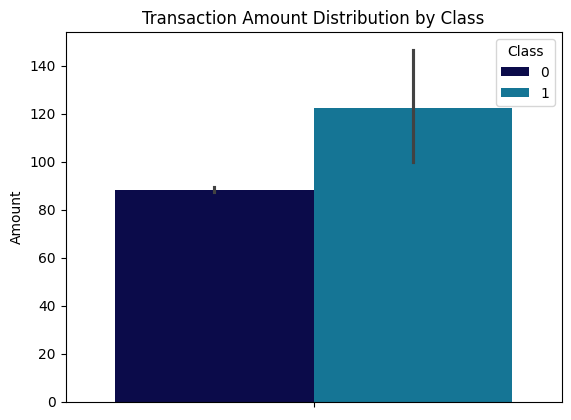

In [16]:
# Creating a barplot graph showing transaction amounts grouped by fraud/non-fraud classes
sns.barplot(data=data, y='Amount', hue='Class', palette = 'ocean')
plt.title('Transaction Amount Distribution by Class')
plt.show()

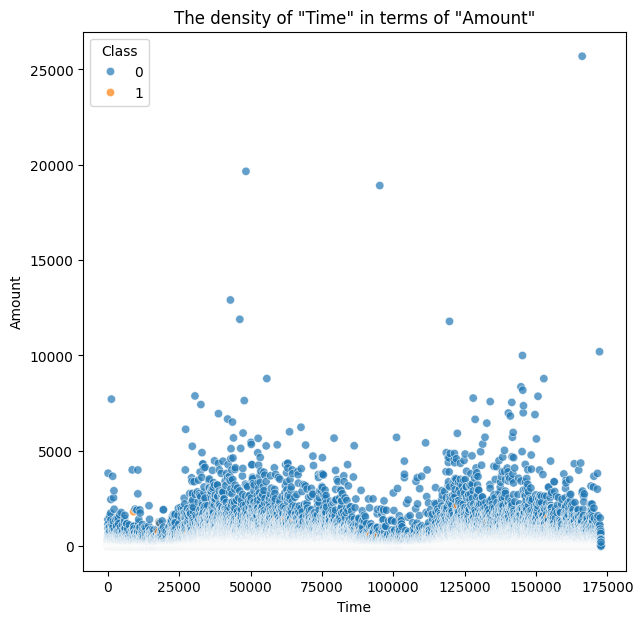

In [17]:
# Showing the distrupution between time and amount
plt.figure(figsize=[7, 7])
sns.scatterplot(data= data, x= 'Time', y= 'Amount', hue= 'Class', alpha= 0.7)
plt.title('The density of "Time" in terms of "Amount"')
plt.show()

### Answering the questions
#### Q: What does this data describe?
#### A: *The data discribes some real, encodded money transfer opperations*
######
#### Q: What columns do we have?
#### A: *['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount','Class']*
######
#### Q: Are there missing values?
#### A: *No, there are not. and if (in the future) we got some, there are codes to handle it*
######
#### Q: What patterns do we see?
#### A: *1-  Fraud transactions appear less often than non‑fraud transactions, but they are still noticeable in the dataset.*
#### 2- *Fraud transactions often have unusual Amount values either very small or very large compared to normal transactions.*
#### 3- *There are no missing values in the dataset.*

# Section B: Data Analysis and Preparation

<a name='1'></a>
## STEP 4: Preparing Data

In [18]:
# To drop (delete) the records (rows) that have any null values
# Even if it seems that there is no null values, if we add anymore to the data there is a chance to null values to apper
data = data.dropna()

# Spliting the data into two parts: x = The fetures (the variables that the model will predict from)
x = data.drop('Class', axis=1)
y = data['Class']
# Spliting the data into two parts: y = The target (the variable that the model will try to predict)

# Encoding the data to make the catagorical column numerical (it's the target here)
# Although we have it numerical now (0 = non-fraud, 1 = fraud), in the future, we might get some catagorical ones
lbl_encoder = LabelEncoder()
data['Class'] = lbl_encoder.fit_transform(data['Class'])

# To transform the outlairs into smaller numbers
scaler = MinMaxScaler()

# We used MinMaxScaler to normalize all features to range [0,1] so the logistic regression model can train more efficiently.
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [19]:
# Making the variables that used to train and test: x = The fetures (the variables that the model will predict from)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42,stratify=y)
# making the variables that used to train and test: y = The target (the variable that the model will try to predict)

# Printing the shape of the vaiables to make sure that the shapes are just as we need
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((227845, 30), (227845,), (56962, 30), (56962,))

In [20]:
# Check on the number of samples in the training and testing sets
print("Training samples:", {len(x_train)})

print("Testing samples:", {len(x_test)})

Training samples: {227845}
Testing samples: {56962}


In [21]:
# Some information about the dataset like the names of the columns, the count of non-null values, etc.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [22]:
# To show the agregation functions of the data, and the "T" is to make vertical and make it easier to read
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


# Sction C: Simple Machine Learning Model

## Problem type:
### Classification (fraud/non-farud)

<a name='1'></a>
## STEP 5: Bulid The Model

In [23]:
# Build the model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(x_train, y_train)

# A massege to confirm that the model completed it's train successfully
print("model trained successfully!")

model trained successfully!


<a name='1'></a>
## STEP 6: Evaluat The Model

In [24]:
# Making predictions according to the testing set
y_pred = model.predict(x_test)

# Accuracy Score: The percentage of correctly predicted instances
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)
print("Accuracy Percentage:", accuracy * 100, "%")

# Confusion Matrix: Shows fraud vs. non-fraud predictions for each class
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix (fraud vs. non-fraud):\n', conf_matrix)

Accuracy Score: 0.9988764439450862
Accuracy Percentage: 99.88764439450863 %
Confusion Matrix (fraud vs. non-fraud):
 [[56851    13]
 [   51    47]]


# Section D: Summary and Final Conclusions

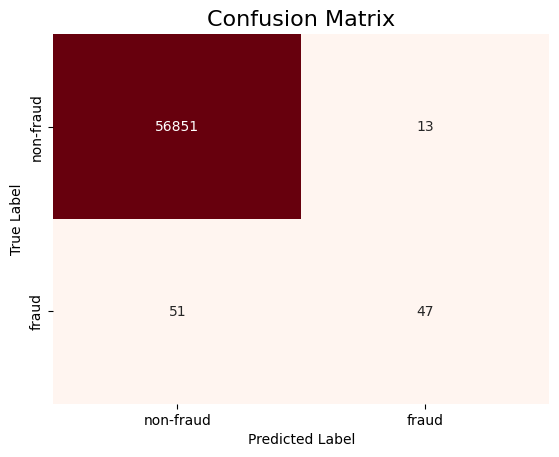

In [25]:
# Creating a heatmap visualization to simplfy the "Confusion Matrix" (in the previous step)
sns.heatmap(
    conf_matrix,
    annot=True,          # Show the numerical values in each cell
    fmt='d',            # Format as integer (count)
    cmap='Reds',        # Use a red color scheme
    cbar=False,          # Do not show the color bar
                        # Set labels for the axes
    xticklabels=['non-fraud', 'fraud'],
    yticklabels=['non-fraud', 'fraud']
)
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### The matrix and the heatmap shows that the model got (56,898) predictions right out of (56,962)